# Performance Analysis of the Players and the Teams

In [2]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting the path to access the data
path = r"C:\Users\Mihir\8_CAPSTONE PROJECT\S1_Data_Preprocessing\1_Preprocessing_Data_&_EDA_LEVEL_0\\"
path

'C:\\Users\\Mihir\\8_CAPSTONE PROJECT\\S1_Data_Preprocessing\\1_Preprocessing_Data_&_EDA_LEVEL_0\\\\'

In [4]:
# reading required csv files
appearances = pd.read_csv(path + "appearances_df_no_win.csv")
players = pd.read_csv(path + "players_df_winsorised.csv")
games = pd.read_csv(path + "games_df_winsorised.csv")
game_events = pd.read_csv(path + "game_events_df_no_win.csv")
game_lineups = pd.read_csv(path + "game_lineups_df_no_win.csv")
test = pd.read_csv(path + "test data.csv")

# GENERAL EDA QUESTIONS

# 1. How does a player's performance vary across different seasons? 		--- (in excel using rows ai)

# INTERPRETATION:

CHIRISTIAN PULISIC HAS THE AVERAGE OF 4 GOALS ACROSS ALL SEASONS

KENNY SAIEF HAS AVERAGE GOALS OF 2 GOALS PER SEASON

TIMOTHY CHANDLER AND JOHN ANTHONY BROOKS HAVE AVERAGE OF 2 YELLOW CARDS PER SEASONS

CHRISTIAN PULISIC HAS A VERY GOOD PERFORMANCE IN TERMS OF CONTRIBUTION TO THE TEAMS AND LOW NUMBER OF YELLOW CARDS . 

ALTHOUGH JOHN ANTHONY BROOKS HAS AVERAGE OF 2 GOALS PER SEASON, THE NUMBER OF YELLOW CARDS RECEIVED SHOWS THAT THE PLAYER HAS TO IMPROVE ON HIS AGGRESSION (IN-GAME ATTITUDE) AND OR IMPROVE HIS GAME.

# 2. On an Average what is the goals and assists for each player? 		--- (in excel using rows ai)

# INTERPRETATION

1.  SERGINO DEST HAS AVERAGE CONTRIBUTION ACROSS ALL SEASONS OF 1.2 GOALS AND ASSISTS
2.  Giovanni Reyna HAS AVERAGE CONTRIBUTION OF 1.14 GOALS AND ASSISTS


# FROM 2 QUESTIONS INTERPRETATION

1. Christian Pulisic and Kenny Saief have greater performance in game and lesser number of fouls 
2. Sergino Dest  and Giovanni Reyna have greater performance across all seasons
3. Christian Pulisic and Kenny Saief  are players who have great performance for some seasons
4. While Sergino Dest  and Giovanni Reyna have consistently out performed all players in all seasons



# 3. Which players contribute the most in terms of goals, assists, and minutes played?	-- (using MySQL and python for visualizing)

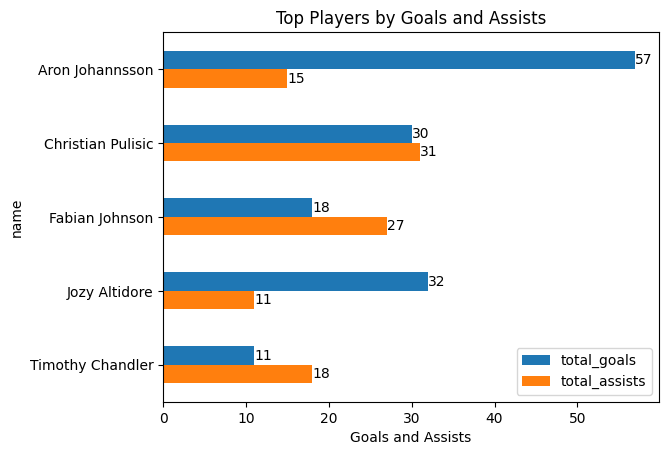

In [12]:
## IMPORTING THE MYSQL.CONNECTOR TO ESTABLISH CONNECTION WITH football_analysis_eda DATABASE IN MYSQL WORKBENCH
import mysql.connector as sql

## ESTABLISHING CONNECTION TO THE DATABASE football_analysis_eda
db = sql.connect(host='localhost', user='root',password='1234',database='football_analysis_eda')
# display(db)

## CREATING CURSOR OBJECT TO ACCESS THE TABLES WITHING
my_cursor = db.cursor()
# display(my_cursor)

# Accessing the view created in sql workbench
query = ''' SELECT * FROM PERFORMANCE_PLAYER_CONTRIBUTION;'''
PERFORMANCE_PLAYER_CONTRIBUTION = pd.read_sql_query(query, db)
db.close()

PERFORMANCE_PLAYER_CONTRIBUTION.iloc[:, :-1].drop('player_id', axis = 1).set_index('name').head(5).plot(kind = 'barh')
plt.gca().invert_yaxis()
for bar in plt.gca().containers:
    plt.bar_label(bar, fmt = '%.0f')
plt.title('Top Players by Goals and Assists')
plt.xlabel('Goals and Assists');

# INTERPRETATIONS
Top 3 players by TOTAL goals and assists SCORED ACROSS ALL SEASONS AND ALL COMPETITIONS are - 
1. Aron Johannsson has 57 goals and 15 assists
2. Christian Pulisic has 30 goals and 31 assists
3. Fabian Johnson has 18 goals and 27 assists

4. ARON JOHANSSON HAS MORE INCLINATION TOWARDS SCORING GOALS THAN ASSISTS 57 GOALS AND 15 ASSIST
5. CHRISTIAN PULISIC HAS CONTRIBUTED ALMOST EQUALLY IN GOALS AND ASSISTS 30 GOALS AND 31 ASSISTS – MORE BALANCED PLAYER IN TERMS OF GOALS AND ASSISTS
6. FABIAN JOHNSON HAS CONTRIBUTED MORE TOWARDS ASSISTS THAN GOALS , 18 GOALS AND 27 ASSISTS  SHOWING MORE INCLINATION TOWARDS ASSISTING TEAM WINN


# 4. What are the patterns of red and yellow cards for different players and teams?(4. Which players have most yellow and red cards?)	-- (using MySQL and python for visualizing)

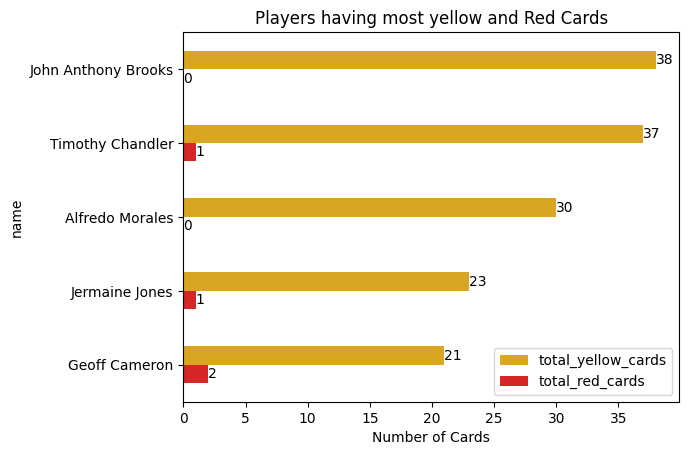

In [15]:
## IMPORTING THE MYSQL.CONNECTOR TO ESTABLISH CONNECTION WITH football_analysis_eda DATABASE IN MYSQL WORKBENCH
import mysql.connector as sql

## ESTABLISHING CONNECTION TO THE DATABASE football_analysis_eda
db = sql.connect(host='localhost', user='root',password='1234',database='football_analysis_eda')
# display(db)

## CREATING CURSOR OBJECT TO ACCESS THE TABLES WITHING
my_cursor = db.cursor()
# display(my_cursor)

# Accessing the view created in sql workbench
query = ''' SELECT * FROM PERFORMANCE_CARDS_PLAYER;'''
PERFORMANCE_CARDS_PLAYER = pd.read_sql_query(query, db)
db.close()

PERFORMANCE_CARDS_PLAYER.drop('player_id', axis = 1).set_index('name').head(5).plot(kind = 'barh',
                                                                                    stacked = False, 
                                                                                    color = ["goldenrod", 'tab:red'])
plt.gca().invert_yaxis()
for bar in plt.gca().containers:
    plt.bar_label(bar, fmt = '%.0f')
plt.title('Players having most yellow and Red Cards')
plt.xlabel('Number of Cards');

# DETAILED EDA QUESTIONS

# 1. Which players contribute most to team victories through goals?
##  Assuming that the home and away goals are given in the games tables are as per players and as per the teams

In [18]:
# We want only the players who have scored goals
print("Types of events: ", game_events["type"].unique())

# Filtering only the Goal Events
events_goals_assists = game_events[game_events['type'] == "Goals"]
print(events_goals_assists.shape)

# Merge with games data to get match results
events_with_games = pd.merge(events_goals_assists, games, on='game_id', how='inner')
print(events_with_games.shape)

# Filter for games where the player's team won -- team wins when goals are more than the opponents goals
# when player plays in home grounds and when home goals are more than the away goals
home_wins = (events_with_games['home_club_goals'] > events_with_games['away_club_goals']) 
away_wins = (events_with_games['away_club_goals'] > events_with_games['home_club_goals'])

# Filter events where the player's team won excluding the ties
won_events = events_with_games[home_wins]

# Aggregate the goals and assists per player
player_contributions = won_events.groupby('player_id').agg(
    home_goals=("home_club_goals", "sum"),
    away_goals=("away_club_goals", "sum"),
    games_won=('game_id', 'nunique')).reset_index()

player_contributions

Types of events:  ['Substitutions' 'Cards' 'Goals']
(509, 8)
(346, 25)


,player_id,home_goals,away_goals,games_won
0,1321,6,1,2
1,4267,3,1,1
2,27577,28,10,6
3,30593,2,0,1
4,31041,31,12,9
5,31642,3,1,1
6,38383,3,1,1
7,39378,54,7,6
8,39475,27,7,7
9,39897,8,2,2


In [19]:
# Merge player names from players 
player_contributions = pd.merge(player_contributions, players[['player_id', 'name']], 
                                left_on='player_id', right_on='player_id', how='left')

# Reorder the names and player names
player_contributions = player_contributions[["player_id", "name", "home_goals", "away_goals","games_won"]]

# Sort by total contributions (home and away goal)
player_contributions['total_goals'] = player_contributions['home_goals'] + player_contributions['away_goals']
top_players = player_contributions.sort_values(by='total_goals', ascending=False).head(10)
top_players

# top_players[['name', 'home_goals', 'away_goals', 'games_won', "total_contributions"]]

,player_id,name,home_goals,away_goals,games_won,total_goals
16,119169,Aron Johannsson,102,40,22,142
7,39378,Jozy Altidore,54,7,6,61
27,315779,Christian Pulisic,44,13,13,57
4,31041,Fabian Johnson,31,12,9,43
2,27577,Clint Dempsey,28,10,6,38
8,39475,Sacha Kljestan,27,7,7,34
12,72519,Bobby Wood,25,8,8,33
10,49723,Timothy Chandler,23,3,5,26
30,336160,Andrija Novakovich,18,7,5,25
17,124732,John Anthony Brooks,19,5,7,24


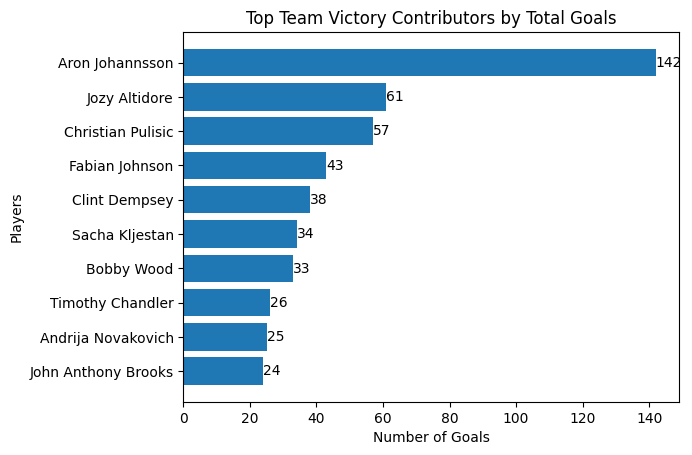

In [20]:
# Visualizing the Data
plt.barh(y = top_players["name"].unique(), width = top_players["total_goals"])

for each_bar in plt.gca().containers:
    plt.bar_label(each_bar, fmt = "%.d")
    
plt.gca().invert_yaxis()

plt.title("Top Team Victory Contributors by Total Goals")
plt.ylabel("Players")
plt.xlabel("Number of Goals");

# 2. How does the performance of key players impact the overall success of the team?

In [22]:
key_player_ids = PERFORMANCE_PLAYER_CONTRIBUTION['player_id'].head(10).tolist()
key_player_ids

[119169, 315779, 31041, 39378, 49723, 39475, 209019, 27577, 72519, 124732]

{'Bobby Wood': 51.9,
 'Aron Johannsson': 50.0,
 'Sacha Kljestan': 49.37,
 'Kenny Saief': 47.75,
 'Timothy Chandler': 47.67,
 'Fabian Johnson': 47.24,
 'John Anthony Brooks': 44.63,
 'Christian Pulisic': 44.03,
 'Clint Dempsey': 43.75,
 'Jozy Altidore': 32.94}

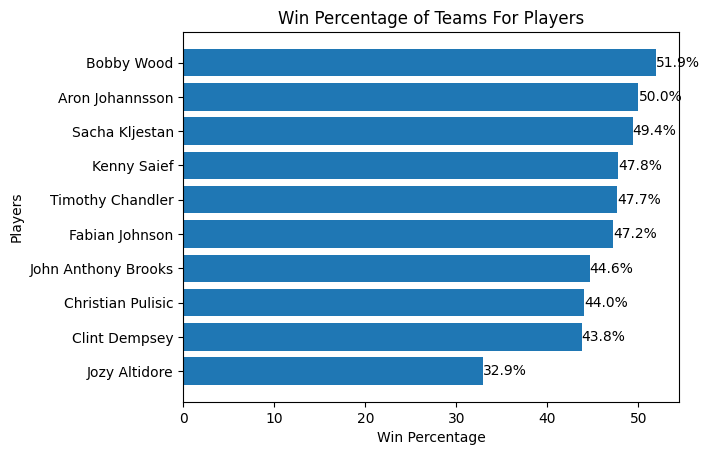

In [23]:
# Merge appearances with games to see if key players played in a game
appearances_with_games = pd.merge(appearances, games, on='game_id', how='inner')

# Filter games where a key player played
key_player_appearances = appearances_with_games[appearances_with_games['player_id'].isin(key_player_ids)]

player_prob = {}
# Calculate the team win percentage in games where a key player played
for i in key_player_appearances["player_name"].unique():

    # Filtering the wins by home and away wins
    home_wins_key = (key_player_appearances['home_club_goals'] > key_player_appearances['away_club_goals']) & (key_player_appearances["player_name"] == i)
    # away_wins_key = (key_player_appearances['away_club_goals'] > key_player_appearances['home_club_goals']) & (key_player_appearances["player_name"] == i)

    # get total games played by each player
    total_games_played = key_player_appearances[key_player_appearances["player_name"] == i].shape[0]
    games_won_by_key_player_team = key_player_appearances[home_wins_key] ### doubt  should it be away
    win_percentage_with_key_player = len(games_won_by_key_player_team) / total_games_played * 100
    
    # print(f"{i}")
    # print(f"Games played : {total_games_played}")
    # print(f"Games Won : {games_won_by_key_player_team.shape[0]}")
    # print(f"Team win percentage when {i} contribute: {win_percentage_with_key_player:.2f}%")
    player_prob[i] = round(win_percentage_with_key_player, 2)
    # print()
player_prob = dict(sorted(player_prob.items(), key = lambda item: item[1], reverse = True))
display(player_prob)


player_names = [x for x in player_prob.keys()]
win_percentage = [float(x) for x in player_prob.values()]

# Visualizing the Data
plt.barh(y = player_names, width = win_percentage)

for each_bar in plt.gca().containers:
    plt.bar_label(each_bar, fmt = "%.1f%%")
    
plt.gca().invert_yaxis()

plt.title("Win Percentage of Teams For Players")
plt.ylabel("Players")
plt.xlabel("Win Percentage");

# 3. How do teams perform when playing at home versus away?

In [25]:
# Calculating performance metrics for each team in home grounds
home_stats_list = []
away_stats_list = []

for i in games["home_club_name"].unique():
    # filter only home clubs
    home_games = games[games['home_club_name'] == i]  
    home_stats = {
        "Team_name" : i, 
        'home_games_played': int(len(home_games)), 
        'home_goals_scored': int(home_games['home_club_goals'].sum()),
        'home_win_percentage': (len(home_games[home_games['home_club_goals'] > home_games['away_club_goals']]) / home_games.shape[0]) * 100
    }
    home_stats_list.append(home_stats)

# Calculating performance metrics for each team in away grounds
for i in games["away_club_name"].unique():
    # filter only home clubs
    away_games = games[games['away_club_name'] == i]  
    away_stats = {
        "Team_name" : i, 
        'away_games_played': int(len(away_games)), 
        'away_goals_scored': int(away_games['away_club_goals'].sum()),
        'away_win_percentage': (len(away_games[away_games['away_club_goals'] > away_games['home_club_goals']]) / away_games.shape[0] )* 100
    }
    away_stats_list.append(away_stats)

# Create DataFrames from the lists
home_stats_df, away_stats_df = pd.DataFrame(home_stats_list), pd.DataFrame(away_stats_list)

# Merge both DataFrames to compare stats side by side
combined_stats_df = pd.merge(home_stats_df, away_stats_df, on='Team_name', how='outer')

combined_stats_df.fillna(0, inplace = True) # fill missing values with 0 and save permanently

# finding total games played
combined_stats_df["total_games_played"] = combined_stats_df["home_games_played"] + combined_stats_df["away_games_played"] 

# finding avg win percentage
combined_stats_df["avg_win_percentage"] = (combined_stats_df["home_win_percentage"] + combined_stats_df["away_win_percentage"])/2 

combined_stats_df

,Team_name,home_games_played,home_goals_scored,home_win_percentage,away_games_played,away_goals_scored,away_win_percentage,total_games_played,avg_win_percentage
0,FK Rostov,3.0,4.0,33.333333,5.0,3.0,0.000000,8.0,16.666667
1,Esbjerg fB,13.0,23.0,38.461538,14.0,10.0,7.142857,27.0,22.802198
2,Randers Fodbold Club,32.0,34.0,50.000000,34.0,43.0,38.235294,66.0,44.117647
3,Aarhus Gymnastik Forening,23.0,27.0,26.086957,22.0,35.0,36.363636,45.0,31.225296
4,Brondby IF,28.0,43.0,39.285714,0.0,0.0,0.000000,28.0,19.642857
...,...,...,...,...,...,...,...,...,...
305,Sivasspor Kula,0.0,0.0,0.000000,1.0,0.0,0.000000,1.0,0.000000
306,Palermo FC,0.0,0.0,0.000000,1.0,1.0,0.000000,1.0,0.000000
307,Real Sociedad De futbol S.A.D,0.0,0.0,0.000000,1.0,2.0,100.000000,1.0,50.000000
308,Antalyaspor,0.0,0.0,0.000000,1.0,0.0,0.000000,1.0,0.000000


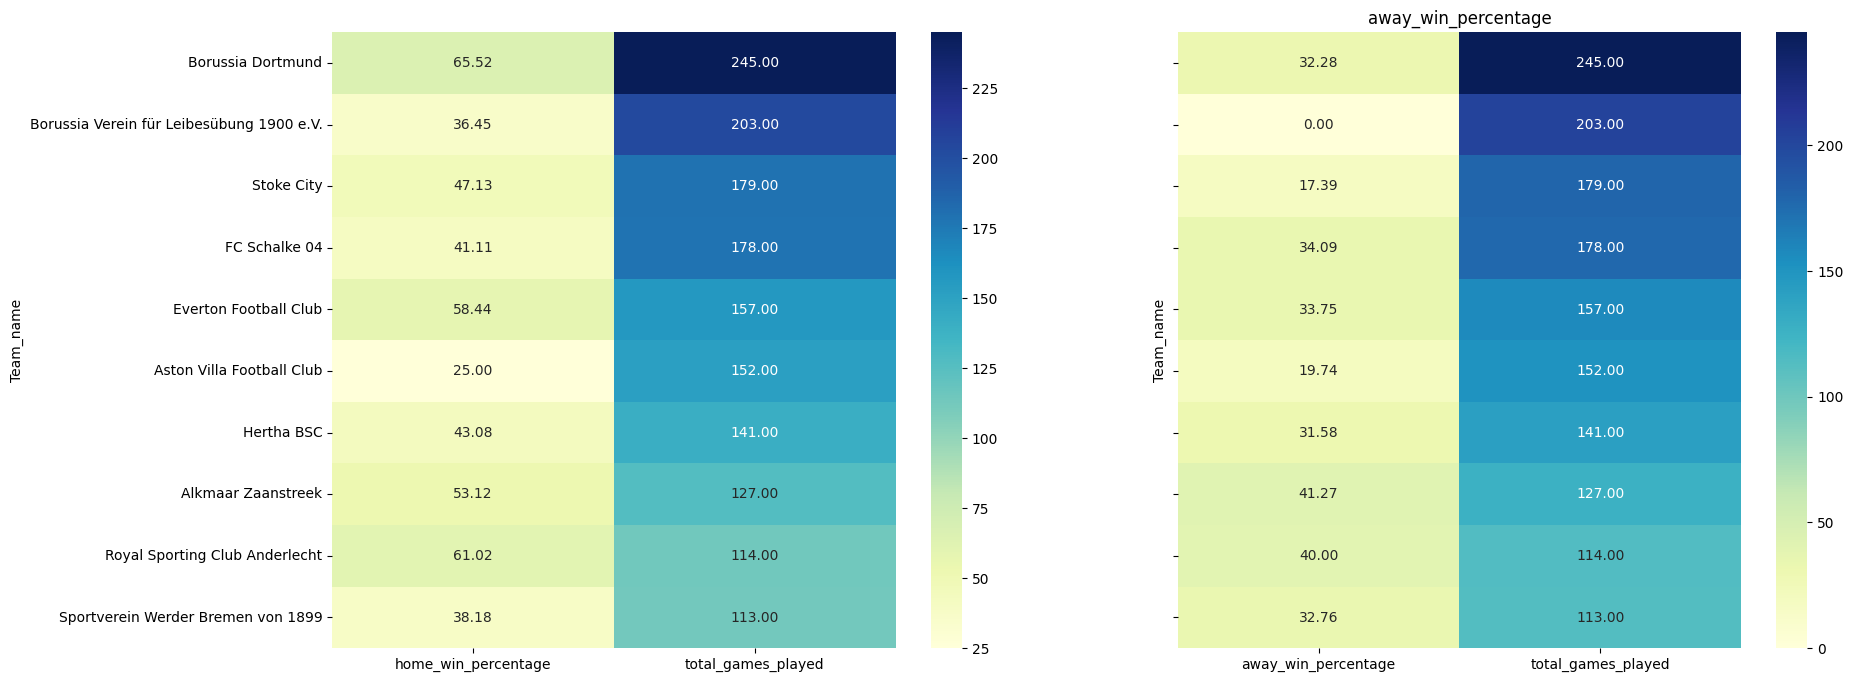

In [26]:
# sorting values for home
top_10_teams_home = combined_stats_df.sort_values(by = ["total_games_played", "home_win_percentage"], ascending = [False, False], inplace = True) 
top_10_teams_home = combined_stats_df.head(10).set_index("Team_name")

# sorting values for away
top_10_teams_away = combined_stats_df.sort_values(by = ["total_games_played", "away_win_percentage"], ascending = [False, False], inplace = True) 
top_10_teams_away = combined_stats_df.head(10).set_index("Team_name")

# Plotting heatmap
fig, ax = plt.subplots(1, 2, figsize = (20, 8), sharey= True)
sns.heatmap(top_10_teams_home.loc[:, ["home_win_percentage", 'total_games_played']], annot = True, fmt = ".2f", cmap = "YlGnBu", ax = ax[0]) #
plt.title("home_win_percentage")

sns.heatmap(top_10_teams_away.loc[:, ["away_win_percentage", 'total_games_played']], annot = True, fmt = ".2f", cmap = "YlGnBu", ax = ax[1]) #
plt.title("away_win_percentage");

# PROBABILITY QUESTIONS

# 1. What is the probability of any player making an assist given that the match is in a specific competition? (conditional)

In [29]:
# reading required csv files
appearances = pd.read_csv(path + "appearances_df_no_win.csv")
players = pd.read_csv(path + "players_df_winsorised.csv")
games = pd.read_csv(path + "games_df_winsorised.csv")

# Merge to get game and player data
merged_data = pd.merge(appearances, games, on='game_id')

for i in merged_data['competition_type'].unique():
    # Finding Probability for each league
    competition_data = merged_data[merged_data['competition_type'] == i]
    
    # Total number of appearances in each league
    total_appearances = competition_data.shape[0]
    print(f"Total Games Played in {i}--->{total_appearances}")
    
    # Filter for appearances with at least one assist
    assist_data = competition_data[competition_data['assists'] > 0]
    print(f"Total Assists given {i}--->{assist_data.shape[0]}")
    
    # Probability of making an assist in each league
    probability_of_assist = assist_data.shape[0] / total_appearances
    print(f"Probability of any player making an assist in {i}: {round(probability_of_assist*100, 2)}%")
    print()

Total Games Played in domestic_league--->3065
Total Assists given domestic_league--->205
Probability of any player making an assist in domestic_league: 6.69%

Total Games Played in international_cup--->253
Total Assists given international_cup--->24
Probability of any player making an assist in international_cup: 9.49%

Total Games Played in other--->8
Total Assists given other--->2
Probability of any player making an assist in other: 25.0%

Total Games Played in domestic_cup--->242
Total Assists given domestic_cup--->21
Probability of any player making an assist in domestic_cup: 8.68%



# 2. What is the probability of scoring a goal given that the player is playing in a position?(conditional)

In [31]:
# reading required csv files
appearances = pd.read_csv(path + "appearances_df_no_win.csv")
players = pd.read_csv(path + "players_df_winsorised.csv")
games = pd.read_csv(path + "games_df_winsorised.csv")


# Merge appearances and player data
player_merged = pd.merge(appearances, players, on='player_id')

# Finding Probability for each position
for i in player_merged["position"].unique():
    # Filter for forwards
    forward_players = player_merged[player_merged['position'] == i]
    
    # Total number of appearances by forwards
    total_forward_appearances = forward_players.shape[0]
    print(f"Total Games Played in {i}--->{total_forward_appearances}")
    
    # Filter for forwards who scored at least one goal
    with_goals = forward_players[forward_players['goals'] > 0].shape[0]
    print(f"Total Goals by {i}--->{with_goals}")

    # Probability of scoring a goal given the player is a forward
    probability_of_goal_as_forward = with_goals / total_forward_appearances
    print(f"Probability of scoring a goal as a {i}: {round(probability_of_goal_as_forward*100, 2)}%")
    print()

Total Games Played in Attack--->1157
Total Goals by Attack--->191
Probability of scoring a goal as a Attack: 16.51%

Total Games Played in Midfield--->934
Total Goals by Midfield--->64
Probability of scoring a goal as a Midfield: 6.85%

Total Games Played in Defender--->1060
Total Goals by Defender--->43
Probability of scoring a goal as a Defender: 4.06%

Total Games Played in Goalkeeper--->417
Total Goals by Goalkeeper--->0
Probability of scoring a goal as a Goalkeeper: 0.0%



In [32]:
# reading required csv files
appearances = pd.read_csv(path + "appearances_df_no_win.csv")
players = pd.read_csv(path + "players_df_winsorised.csv")
games = pd.read_csv(path + "games_df_winsorised.csv")

sub_position_dict = {}

# Merge appearances and player data
player_merged = pd.merge(appearances, players, how = "inner", on = "player_id")

# Finding Probability for each sub_position
for i in player_merged["sub_position"].unique():
    # Filter for forwards
    forward_players = player_merged[player_merged['sub_position'] == i]
    
    # Total number of appearances sub_position
    total_forward_appearances = forward_players.shape[0]
    # print(f"Total Games Played in {i}--->{total_forward_appearances}")
    
    # Filter for forwards who scored at least one goal
    with_goals = forward_players[forward_players['goals'] > 0].shape[0]
    # print(f"Total Goals by {i}--->{with_goals}")

    # Probability of scoring a goal given the player for each sub_position
    probability_of_goal_as_forward = round(with_goals / total_forward_appearances*100, 2)
    # print(f"Probability of scoring a goal as a {i}: {probability_of_goal_as_forward}%")
    # print()
    
    sub_position_dict[i] = float(probability_of_goal_as_forward)
sub_position_dict = dict(sorted(sub_position_dict.items(), key = lambda item: item[1], reverse = True))
sub_position_dict

{'Right Midfield': 22.22,
 'Second Striker': 20.83,
 'Centre-Forward': 20.75,
 'Attacking Midfield': 14.29,
 'Right Winger': 14.24,
 'Left Winger': 9.13,
 'Central Midfield': 6.47,
 'Centre-Back': 4.61,
 'Defensive Midfield': 4.01,
 'Right-Back': 3.25,
 'Goalkeeper': 0.0,
 'Left Midfield': 0.0}

# 3. What is the joint probability of a player playing more than 50 minutes and getting at least one assist?(joint probability)

In [34]:
# Total number of player appearances (for the season or data set)
total_appearances = appearances.shape[0]

# Filter for appearances with more than 50 minutes and at least one assist
long_play_assist = appearances[(appearances['minutes_played'] > 50) & (appearances['assists'] > 0)]

# Joint probability of playing > 50 minutes and getting at least one assist
joint_probability = long_play_assist.shape[0] / total_appearances
print(f"Joint probability of playing >50 minutes and getting an assist: {joint_probability*100}")

Joint probability of playing >50 minutes and getting an assist: 5.969730941704036


# 4. How is the Home club goals and away club goals distributed to confirm the central limit theorem? (clt)

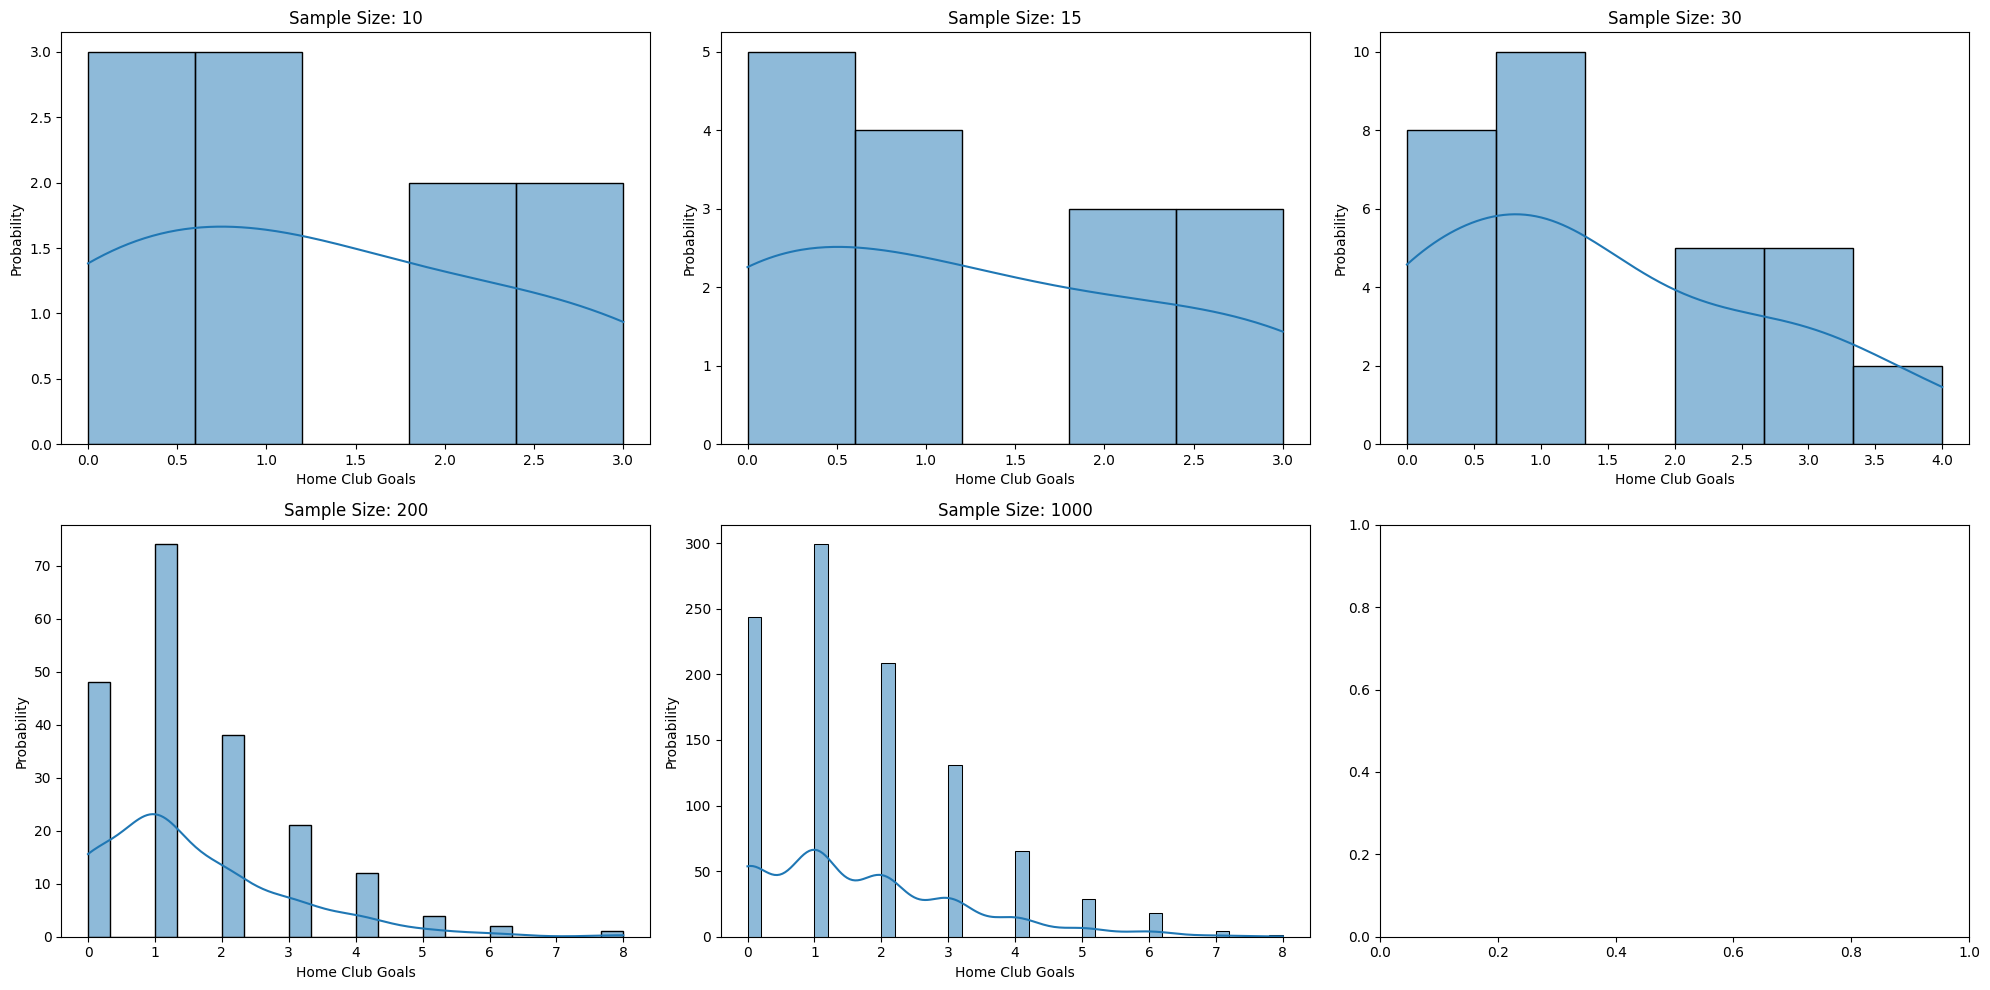

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample size list to test CLT with different sizes
sample_sizes = [10, 15, 30, 200, 1000]

# Taking 'home_club_goals' as the variable of interest
goals = games['home_club_goals']

# List to store samples of different sizes
samples_data = []

for size in sample_sizes:
    temp_samples = goals.sample(size, random_state=10)  # Randomly sample goals data
    samples_data.append(temp_samples.tolist())

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Adjust the number of subplots to match the number of sample sizes
fig, ax = plt.subplots(2, 3, figsize=(20, 10))  # Only need 5 subplots, (2x3 layout)
ax = ax.flatten()

# Limit the number of plots to the number of sample sizes
for i in range(len(samples_data)):
    sns.histplot(samples_data[i], ax=ax[i], kde=True)  # Plot the histogram with KDE
    ax[i].set(title='Sample Size: ' + str(len(samples_data[i])),
              xlabel="Home Club Goals",
              ylabel="Probability")

# Remove unused subplots
# for j in range(len(samples_data), len(ax)):
#     fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


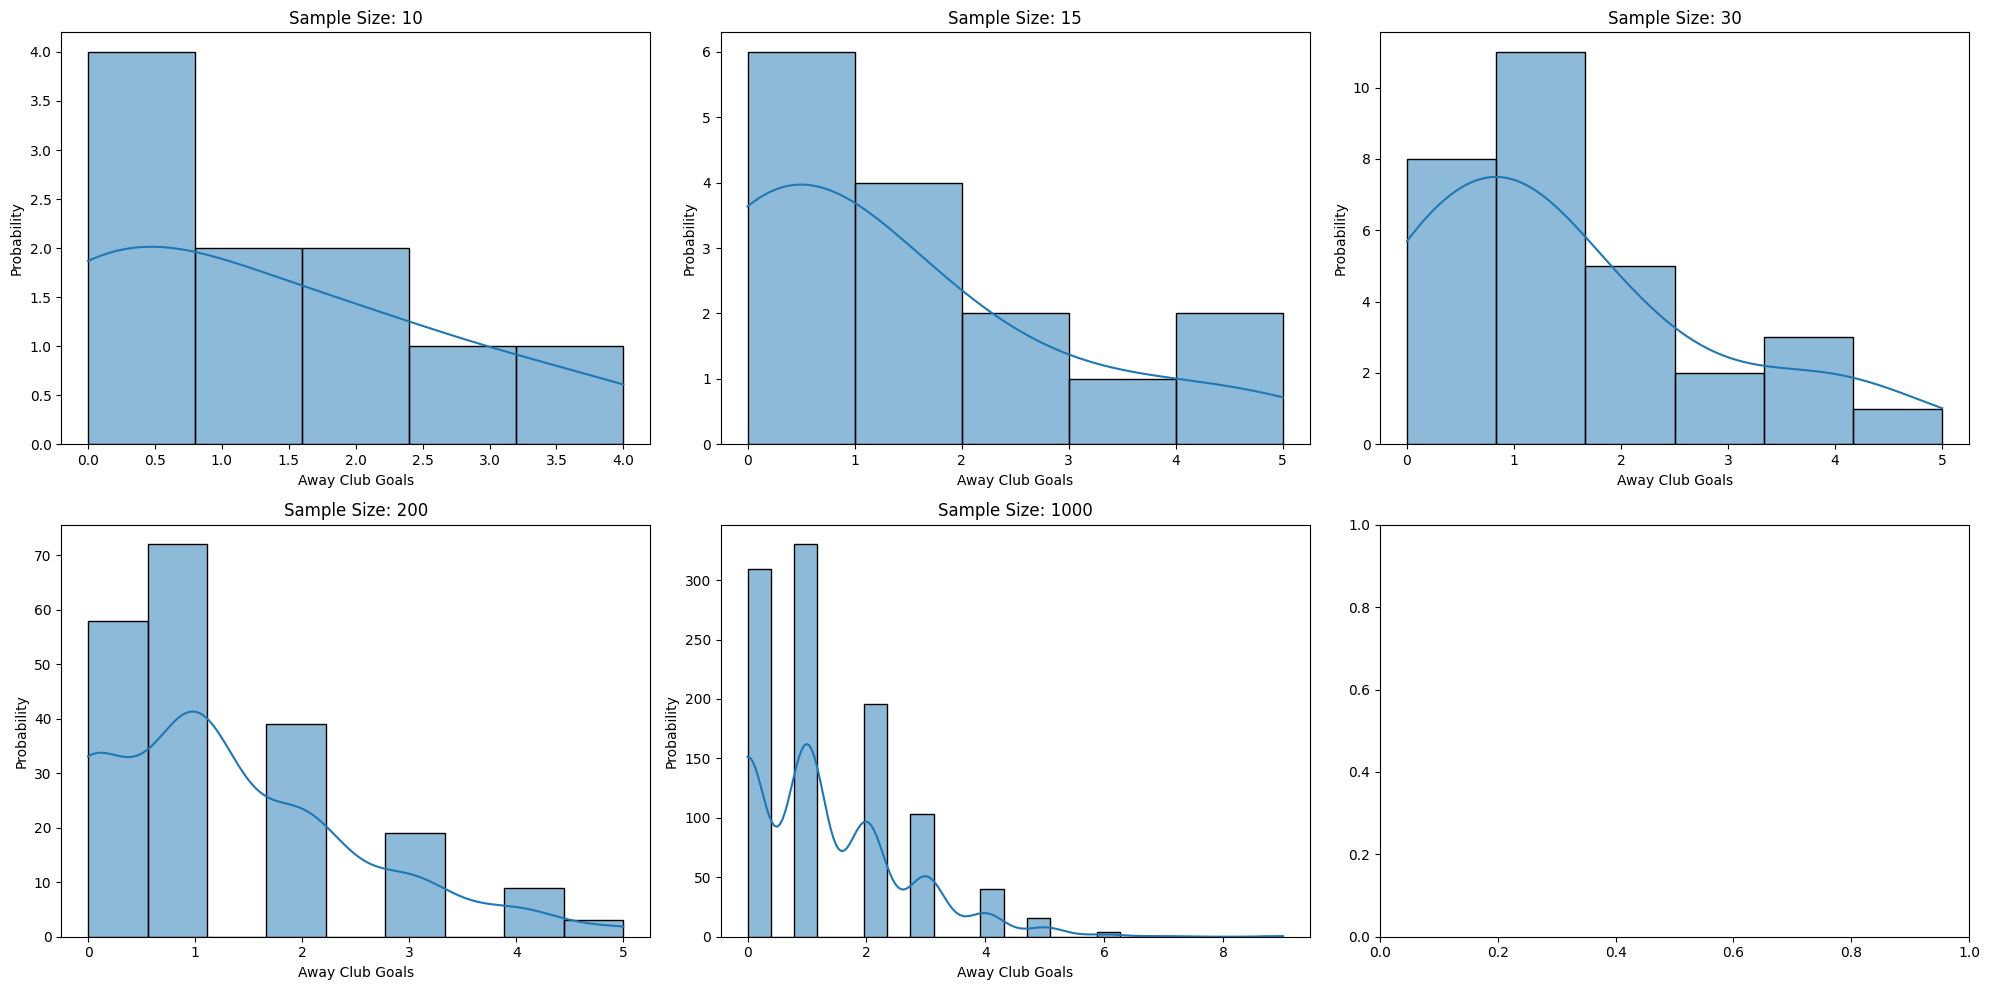

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample size list to test CLT with different sizes
sample_sizes = [10, 15, 30, 200, 1000]

# Taking 'away_club_goals' as the variable of interest
goals = games['away_club_goals']

# List to store samples of different sizes
samples_data = []

for size in sample_sizes:
    temp_samples = goals.sample(size, random_state=10)  # Randomly sample goals data
    samples_data.append(temp_samples.tolist())

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Adjust the number of subplots to match the number of sample sizes
fig, ax = plt.subplots(2, 3, figsize=(20, 10))  # Only need 5 subplots, (2x3 layout)
ax = ax.flatten()

# Limit the number of plots to the number of sample sizes
for i in range(len(samples_data)):
    sns.histplot(samples_data[i], ax=ax[i], kde=True)  # Plot the histogram with KDE
    ax[i].set(title='Sample Size: ' + str(len(samples_data[i])),
              xlabel="Away Club Goals",
              ylabel="Probability")

# Remove unused subplots
# for j in range(len(samples_data), len(ax)):
#     fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


In [38]:
import numpy as np

# Sample size
sample_size = 30

# Randomly sample matches from the games table to assess team performance
sampled_matches = games.sample(n=sample_size, random_state=0)

# Calculate mean performance indicators for the sample (e.g., goals scored)
mean_home_goals = sampled_matches['home_club_goals'].mean()
mean_away_goals = sampled_matches['away_club_goals'].mean()

print(f"Mean home goals in sample: {mean_home_goals}")
print(f"Mean away goals in sample: {mean_away_goals}")
print()
# Calculating and printing means for the population to compare means of samples and populations
print(f"Mean home goals in population: {games['home_club_goals'].mean()}")
print(f"Mean away goals in population: {games['away_club_goals'].mean()}")

Mean home goals in sample: 2.0
Mean away goals in sample: 1.4333333333333333

Mean home goals in population: 1.6312729498164014
Mean away goals in population: 1.3078335373317014


# Can we predict if a player will receive a yellow card based on their previous performance metrics? 

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score 
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, RocCurveDisplay, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [123]:
# Merge players with their appearance records to get performance data
player_performance = pd.merge(appearances, players[['player_id', 'name']], on='player_id')
print(player_performance.shape)

## assuming 0 -- no yellow card
## assuming 1 -- give yellow card

yes_yellow_card = (player_performance["yellow_cards"] > 0)
no_yellow_card = (player_performance["yellow_cards"] == 0)

player_performance["received_yellow_card"] = np.nan
player_performance.loc[yes_yellow_card, "received_yellow_card"] = 1 # has yellow card
player_performance.loc[no_yellow_card, "received_yellow_card"] = 0 # does not have yellow card

(3568, 12)


In [125]:
player_performance[['goals', 'assists', 'minutes_played', 'received_yellow_card']]['received_yellow_card'].value_counts()

received_yellow_card
0.0    3128
1.0     440
Name: count, dtype: int64

In [127]:
# Scale the data for training data
x_features = ['goals', 'assists', 'minutes_played']
y_feature = 'received_yellow_card'

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(player_performance[x_features]), columns =x_features) 

data_final = pd.concat((data_scaled, player_performance[y_feature]), axis = 1 )
data_final.head(2)

,goals,assists,minutes_played,received_yellow_card
0,-0.282383,-0.270588,0.648636,0.0
1,-0.282383,-0.270588,0.120325,0.0


In [129]:
X = data_final[x_features]
y = data_final[y_feature].values
print(X.shape)
print(y.shape)
print()
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

(3568, 3)
(3568,)

X_train shape:  (2854, 3)
X_test shape:  (714, 3)
y_train shape:  (2854,)
y_test shape:  (714,)


# LOGISTIC REGRESSION

In [132]:
# Training the Model on Logistic Regression
model = LogisticRegression()
display(model.fit(X_train, y_train))

y_pred = model.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['No Yellow Card', 'Yellow Card']))

LogisticRegression()

Confusion Matrix:
 [[624   0]
 [ 90   0]]
                precision    recall  f1-score   support

No Yellow Card       0.87      1.00      0.93       624
   Yellow Card       0.00      0.00      0.00        90

      accuracy                           0.87       714
     macro avg       0.44      0.50      0.47       714
  weighted avg       0.76      0.87      0.82       714



<Figure size 1000x900 with 0 Axes>

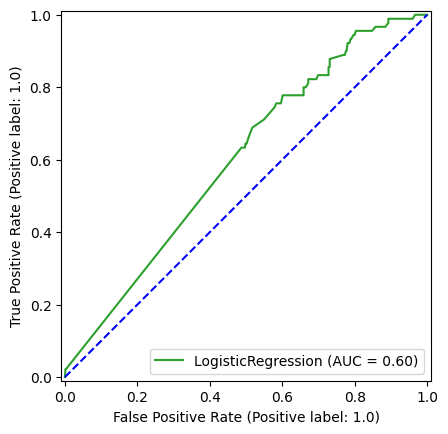

In [135]:
plt.figure(figsize=(10, 9))
RocCurveDisplay.from_estimator(model, X_test, y_test, color = "tab:green")
plt.plot([0, 1], [0, 1], color = "blue", linestyle = "--")

In [137]:
yes_yellow_card = (test["yellow_cards"] > 0)
no_yellow_card = (test["yellow_cards"] == 0)

test["received_yellow_card"] = np.nan
test.loc[yes_yellow_card, "received_yellow_card"] = 1 # has yellow card
test.loc[no_yellow_card, "received_yellow_card"] = 0 # does not have yellow card

In [139]:
# Predicting the data on test data
predict_data_test = pd.DataFrame(scaler.fit_transform(test[x_features]), columns = test[x_features].columns)
# predict_data_test

## Scale the Dependent Variable of Test Data
target_scaler = StandardScaler()
target_scaler.fit(test[["received_yellow_card"]])

## Predicting the Dependent Variable (scaled prediction)
predicted = model.predict(predict_data_test)
print("Scaled Prediction: ", predicted)
print()

## Unscale the Predicted
Unscaled_predicted = target_scaler.inverse_transform(predicted.reshape(-1, 1))
print("UnScaled Prediction: ", Unscaled_predicted)
print()

## Verifying the Actual Dependent Variable Values
print("Actual Values: ",test["received_yellow_card"].values)

Scaled Prediction:  [0. 0.]

UnScaled Prediction:  [[0.]
 [0.]]

Actual Values:  [0. 0.]


# random forest classifier

In [144]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest on resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Evaluate
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_pred, target_names=['No Yellow Card', 'Yellow Card']))

# Evaluate the model
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

Confusion Matrix:
 [[271 353]
 [ 25  65]]
                precision    recall  f1-score   support

No Yellow Card       0.92      0.43      0.59       624
   Yellow Card       0.16      0.72      0.26        90

      accuracy                           0.47       714
     macro avg       0.54      0.58      0.42       714
  weighted avg       0.82      0.47      0.55       714

accuracy: 0.47058823529411764
recall: 0.7222222222222222
f1-score: 0.2559055118110236
precision: 0.15550239234449761


# SAVING FILES TO EXCEL FOR POWERPOINT PRESENTATIONS